* Reference: __Pairs trading: optimal thresholds and profitability.__ by _Zeng, Z._ and _Lee, C.-G._

# OU Model Optimal Trading Thresholds Zeng

## Introduction

This notebook demonstrates an implementation of the methods described in [Zeng, Z. and Lee, C.-G. (2014). Pairs trading: optimal thresholds and profitability.](https://www.tandfonline.com/doi/pdf/10.1080/14697688.2014.917806) for finding optimal trading thresholds.

In this paper, the authors enhance the work in [Bertram(2010)](http://www.stagirit.org/sites/default/files/articles/a_0340_ssrn-id1505073.pdf), which only allows long positions on a tradable process when finding the optimal trading thresholds. To also allow short positions, the authors of the first paper derive a polynomial expression for the expectation of the first-passage time of an O-U process with a two-sided boundary. Then they simplify the problem of optimizing the expected return per unit of time to a problem of solving an equation.

---

## Assumptions

### Price of the Traded Security
The model defines the price of the traded security $p_t$ as,

${p_t = e^{X_t}};\quad{X_{t_0} = x_0}$

where $X_t$ follows an O-U process and satisfies the following stochastic differential equation,

${dX_t = {\mu}({\theta} - X_t)dt + {\sigma}dW_t}$

where
${\theta}$ is the long-term mean, ${\mu}$ is the speed at which the values will regroup around the long-term mean and ${\sigma}$ is the amplitude of randomness of the O-U process.

### Trading Strategy
The Trading strategy is defined as: 

$\left\{
\begin{array}{**lr**} 
Open\ a\ short\ trade\ when\ Y_t = a_d\ and\ close\ the\ exiting\ short\ trade\ at\ Y_t = b_d.\\
Open\ a\ long\ trade\ when\ Y_t = -a_d\ and\ close\ the\ exiting\ long\ trade\ at\ Y_t = -b_d.\\
\end{array}
\right.
$

$a_d$ and $b_d$ is the entry and exit thresholds in the dimensionless system, respectively.

The $Y_t$ is a dimensionless series transformed from the original time series $X_t$, 
 

### Trading Cycle
The trading cycle is completed as $Y_t$ change from $a_d$ to $b_d$, then back to $a_d$ or $-a_d$.

### Trade Length
The trade length $T$ is defined as the time needed to complete a trading cycle.

---

## Analytic Formulae

### Mean and Variance of the Trade Length
$E[T] = \frac{1}{2\mu}\sum_{k=0}^{\infty} \Gamma(\frac{2k + 1}{2})((\sqrt{2}a_d)^{2k + 1} - (\sqrt{2}b_d)^{2k + 1})/ (2k + 1)!$,

$V[T] = \frac{1}{\mu^2}(V[T_{a_d,\ b_d}] + V[T_{-a_d,\ a_d,\ b_d}])$,

where $V[T_{a_d,\ b_d}]$ is the variance of the time taken for the O-U process to travel from $a_d$ to $b_d$,

and $V[T_{-a_d,\ a_d,\ b_d}]$ is the variance of the time taken for the O-U process to travel from $b_d$ to $a_d$ or -$a_d$.

$V[T_{a_d,\ b_d}] = {w_1(a_d)} - {w_1(b_d)} - {w_2(a_d)} + {w_2(b_d)}$,

where 

$w_1(z) = (\frac{1}{2} \sum_{k=1}^{\infty} \Gamma(\frac{k}{2}) (\sqrt{2}z)^k / k! )^2 - (\frac{1}{2} \sum_{n=1}^{\infty} (-1)^k \Gamma(\frac{k}{2}) (\sqrt{2}z)^k / k! )^2$,

$w_2(z) = \sum_{k=1}^{\infty} \Gamma(\frac{2k - 1}{2}) \Psi(\frac{2k - 1}{2}) (\sqrt{2}z)^{2k - 1} / (2k - 1)!$.


$V[T_{-a_d,\ a_d,\ b_d}] = E[T^{2}_{-a_d,\ a_d,\ b_d}] - E[T_{-a_d,\ a_d,\ b_d}]^2$,

where

$E[T_{-a_d,\ a_d,\ b_d}] = \frac{1}{2}\sum_{k=1}^{\infty} \Gamma(k)((\sqrt{2}a_d)^{2k} - (\sqrt{2}b_d)^{2k})/ (2k)!$,

$E[T^{2}_{-a_d,\ a_d,\ b_d}] = e^{(b^2_d - a^2_d)/4}[g_1(a_d,\ b_d) - g_2(a_d,\ b_d)]$,

where

$g_1(a_d,\ b_d) = [(m^{''}(\lambda,\ b_d)\ m(\lambda,\ a_d) - m^{'}(\lambda,\ a_d)\ m^{'}(\lambda,\ b_d))/m^2(\lambda,\ a_d)]|_{\lambda = 0}$,

$g_2(a_d,\ b_d) =[(m^{''}(\lambda,\ a_d)\ m(\lambda,\ b_d) + m^{'}(\lambda,\ a_d)\ m^{'}(\lambda,\ b_d))/m^2(\lambda,\ a_d) - 2(m^{'}(\lambda,\ a_d))^2\ m(\lambda,\ b_d)/m^3(\lambda,\ a_d)]|_{\lambda = 0}$,

where $m(\lambda, x) = D_{-\lambda}(x) + D_{-\lambda}(−x)$,

where $D_{-\lambda}(x) = \sqrt{\frac{2}{\pi}} e^{x^2/4} \int_{0}^{\infty} t^{-\lambda} e^{-t^2/2} \cos(xt + \frac{\lambda\pi}{2})dt$.

### Mean and Variance of the Trading Strategy Return per Unit of Time

$\mu_s(a,\ b,\ c) = \frac{r(a,\ b,\ c)}{E [T]}$

$\sigma_s(a,\ b,\ c) = \frac{{r(a,\ b,\ c)}^2{V[T]}}{{E[T]}^3}$

where $r(a,\ b,\ c) = (|a − b| − c)$ gives the continuously compound rate of return for a single trade accounting for transaction cost,

where $a$, $b$ denotes the entry and exit thresholds, respectively.

---

## Optimal Strategies

To calculate an optimal trading strategy, we seek to choose optimal entry and exit thresholds that maximize the expected return per unit of time for a given transaction cost.

### Get Optimal Thresholds by Maximizing the Expected Return

$Case\ 1 \ \ 0 \leqslant b_d \leqslant a_d$

This paper shows that the maximum expected return occurs when $b_d = 0$. Therefore, for a given transaction cost, the following equation can be solved to find optimal $a_d$.

$\frac{1}{2}\sum_{k=0}^{\infty} \Gamma(\frac{2k + 1}{2})((\sqrt{2}a_d)^{2k + 1} / (2k + 1)! = (a - c) \frac{\sqrt{2}}{2}\sum_{k=0}^{\infty} \Gamma(\frac{2k}{2})((\sqrt{2}a_d)^{2k} / (2k + 1)!$

$Case\ 2 \ \ -a_d \leqslant b_d \leqslant 0$

This paper shows that the maximum expected return occurs when $b_d = -a_d$. Therefore, for a given transaction cost, the following equation can be solved to find optimal $a_d$.

$\frac{1}{2}\sum_{k=0}^{\infty} \Gamma(\frac{2k + 1}{2})((\sqrt{2}a_d)^{2k + 1} / (2k + 1)! = (a - \frac{c}{2}) \frac{\sqrt{2}}{2}\sum_{k=0}^{\infty} \Gamma(\frac{2k}{2})((\sqrt{2}a_d)^{2k} / (2k + 1)!$

### Back Transform from the Dimensionless System

After calculating optimal thresholds in the dimensionless system, we need to use the following formula to transform them back to the original system.

$k = k_d \frac{\sigma}{\sqrt{2\mu}} + \theta$,

where $k_d$ = $a_d$, $b_d$, $-a_d$, $-b_d$ and $k$ = $a_s$, $b_s$, $a_l$, $a_l$,

where

$a_s$, $b_s$ denotes the entry and exit thresholds for a short position,

$a_l$, $b_l$ denotes the entry and exit thresholds for a long position.

---

## Example Usage of the Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from arbitragelab.time_series_approach.ou_optimal_threshold_zeng import OUModelOptimalThresholdZeng

plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Creating a class instance
OUOTZ = OUModelOptimalThresholdZeng()

# Initializing OU-process parameter
OUOTZ.construct_ou_model_from_given_parameters(theta = 3.4241, mu = 0.0237, sigma = 0.0081)

In [3]:
%%time
# Getting optimal thresholds by Conventional Optimal Rule
a_s, b_s, a_l, b_l = OUOTZ.get_threshold_by_conventional_optimal_rule(c = 0.02)

print("Entering a short position when Xt =", a_s)
print("Exiting a short position when Xt =", b_s)
print("Entering a long position when Xt =", a_l)
print("Exiting a long position when Xt =", b_l)

E_s = OUOTZ.expected_return(a = a_s, b = b_s, c = 0.02)
V_s = OUOTZ.return_variance(a = a_s, b = b_s, c = 0.02)
E_l = OUOTZ.expected_return(a = a_l, b = b_l, c = 0.02)
V_l = OUOTZ.return_variance(a = a_l, b = b_l, c = 0.02)

print("Short trade expected return:", E_s)
print("Short trade variance:", V_s)
print("Long trade expected return:", E_l)
print("Long trade variance:", V_l)

Entering a short position when Xt = 3.472571161368142
Exiting a short position when Xt = 3.4241
Entering a long position when Xt = 3.3756288386318585
Exiting a long position when Xt = 3.4241
Short trade expected return: 0.0003012195131674939
Short trade variance: 2.5454987392050962e-05
Long trade expected return: 0.0003012195131674939
Long trade variance: 2.207110248316157e-05
Wall time: 499 ms


In [4]:
%%time
# Getting optimal thresholds by New Optimal Rule
a_s, b_s, a_l, b_l = OUOTZ.get_threshold_by_new_optimal_rule(c = 0.02)

print("Entering a short position when Xt =", a_s)
print("Exiting a short position when Xt =", b_s)
print("Entering a long position when Xt =", a_l)
print("Exiting a long position when Xt =", b_l)

E_s = OUOTZ.expected_return(a = a_s, b = b_s, c = 0.02)
V_s = OUOTZ.return_variance(a = a_s, b = b_s, c = 0.02)
E_l = OUOTZ.expected_return(a = a_l, b = b_l, c = 0.02)
V_l = OUOTZ.return_variance(a = a_l, b = b_l, c = 0.02)

print("Short trade expected return:", E_s)
print("Short trade variance:", V_s)
print("Long trade expected return:", E_l)
print("Long trade variance:", V_l)

Entering a short position when Xt = 3.4609755084353235
Exiting a short position when Xt = 3.3872244915646768
Entering a long position when Xt = 3.3872244915646768
Exiting a long position when Xt = 3.4609755084353235
Short trade expected return: 0.00043061662286274173
Short trade variance: 3.467078460345948e-05
Long trade expected return: 0.00043061662286274173
Long trade variance: 3.467078460345948e-05
Wall time: 500 ms


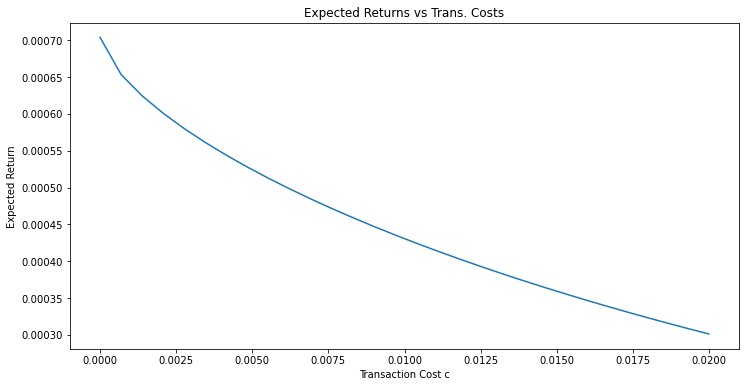

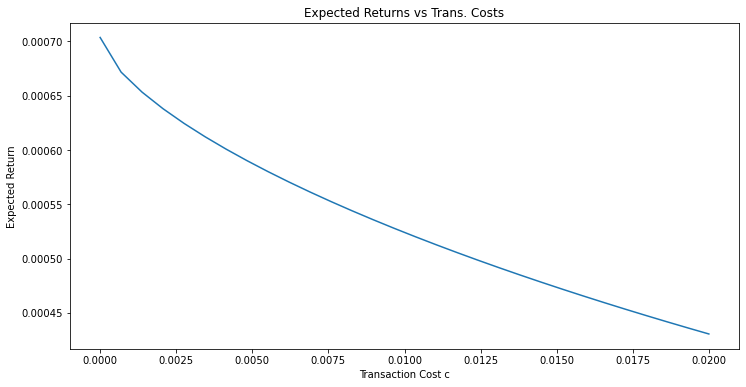

In [5]:
# Comparison of the expected return between the Conventional Optimal Rule and New Optimal Rule
c_list = np.linspace(0, 0.02, 30)
fig_con = OUOTZ.plot_target_vs_c(target = "expected_return", method = "conventional_optimal_rule", c_list = c_list)
fig_new = OUOTZ.plot_target_vs_c(target = "expected_return", method = "new_optimal_rule", c_list = c_list)
plt.show()

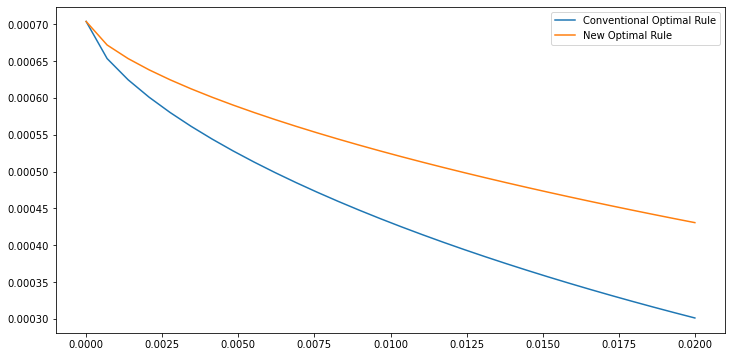

In [6]:
# Combining two figures
ax_con = fig_con.gca()
ax_new = fig_new.gca()

x = ax_con.lines[0].get_xdata()
y_con = ax_con.lines[0].get_ydata()
y_new = ax_new.lines[0].get_ydata()

plt.plot(x, y_con, label = "Conventional Optimal Rule")
plt.plot(x, y_new, label = "New Optimal Rule")
plt.legend()
plt.show()

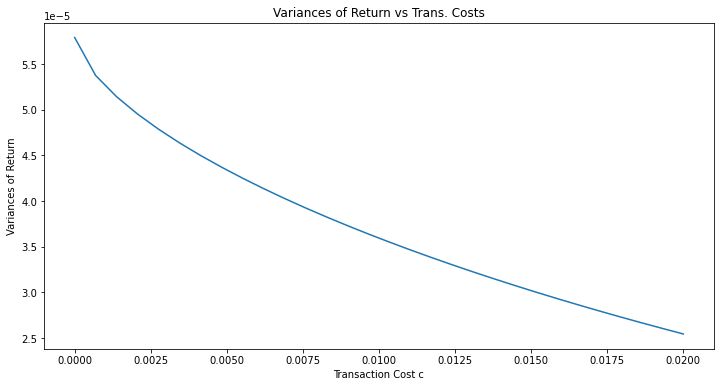

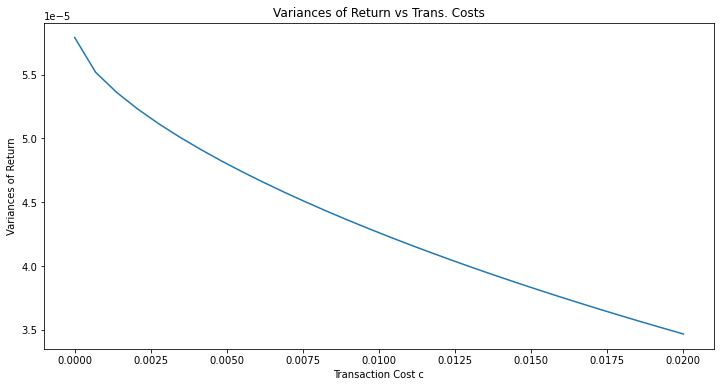

In [7]:
# Comparison of the variance between the Conventional Optimal Rule and New Optimal Rule 
c_list = np.linspace(0, 0.02, 30)
fig_con = OUOTZ.plot_target_vs_c(target = "return_variance", method = "conventional_optimal_rule", c_list = c_list)
fig_new = OUOTZ.plot_target_vs_c(target = "return_variance", method = "new_optimal_rule", c_list = c_list)
plt.show()

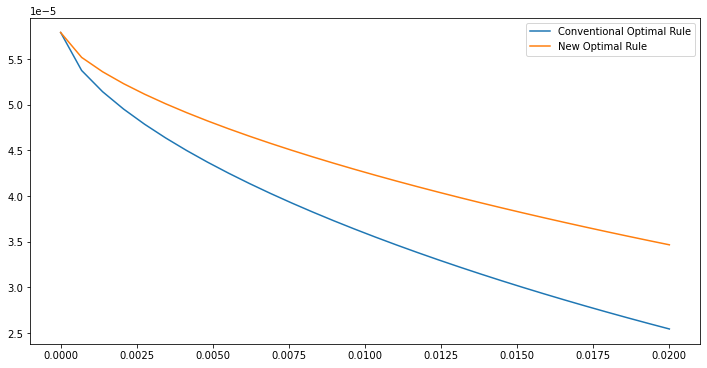

In [8]:
# Combining two figures
ax_con = fig_con.gca()
ax_new = fig_new.gca()

x = ax_con.lines[0].get_xdata()
y_con = ax_con.lines[0].get_ydata()
y_new = ax_new.lines[0].get_ydata()

plt.plot(x, y_con, label = "Conventional Optimal Rule")
plt.plot(x, y_new, label = "New Optimal Rule")
plt.legend()
plt.show()

---

## Reproduction of Empirical Results in the Paper

### Preparing data

In [9]:
import os
import pandas as pd
import datetime

plt.rcParams['figure.figsize'] = (12, 6)

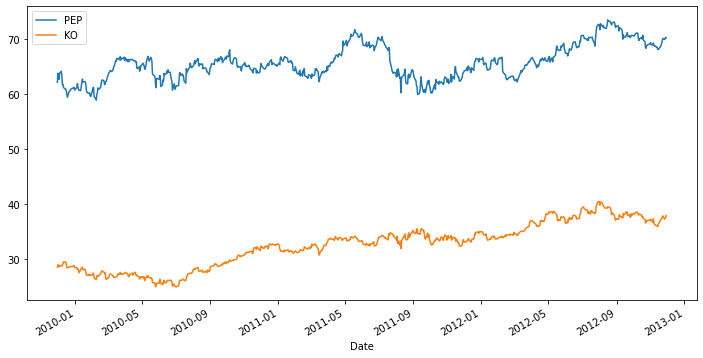

In [10]:
# Getting data path
root_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_1 = os.path.join(root_path, "Sample-Data", "PEP.csv")
path_2 = os.path.join(root_path, "Sample-Data", "KO.csv")

# Loading data
PEP = pd.read_csv(path_1)
KO = pd.read_csv(path_2)

# Setting index
PEP.index = pd.to_datetime(PEP["Date"])
KO.index = pd.to_datetime(KO["Date"])

# Creating Dataframe
data = pd.DataFrame([PEP["Close"], KO["Close"]]).T
data.columns = ["PEP", "KO"]

# Plotting the data
data.plot()
plt.show()

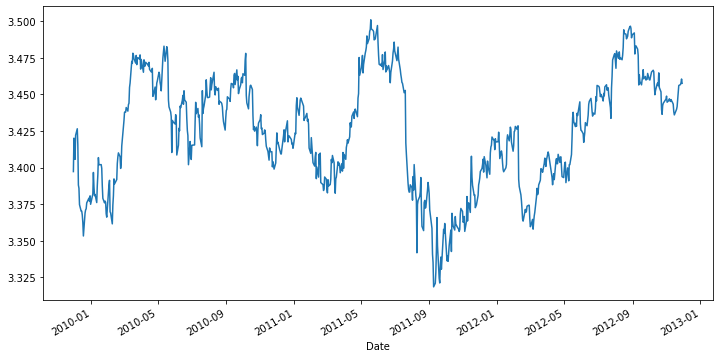

In [11]:
# Generating spread series that follows O-U process
beta = 0.2187
spread_series = np.log(data["PEP"]) - np.log(data["KO"]) * beta

# Plotting the series
spread_series.plot()
plt.show()

### Calculating Optimal Thresholds

In [12]:
# Creating a class instance
OUOTZ = OUModelOptimalThresholdZeng()

# Initializing OU-process parameter
OUOTZ.construct_ou_model_from_given_parameters(theta = 3.4241, mu = 0.0237, sigma = 0.0081)

In [13]:
%%time
# Getting optimal thresholds by New Optimal Rule
a_s, b_s, a_l, b_l = OUOTZ.get_threshold_by_new_optimal_rule(c = 0.02)
print(a_s, b_s, a_l, b_l)

3.4609755084353235 3.3872244915646768 3.3872244915646768 3.4609755084353235
Wall time: 92.5 ms


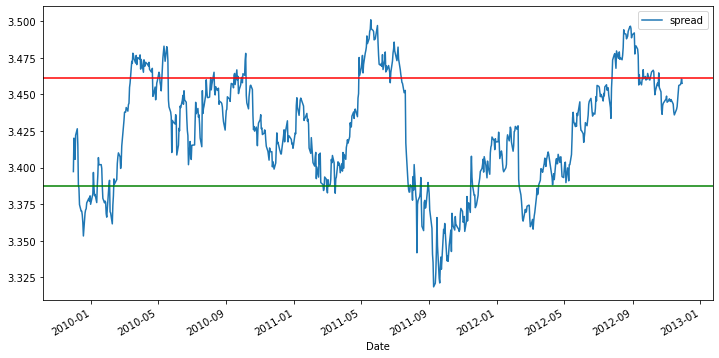

In [14]:
# Plotting the series and thresholds
spread_series.plot(label = "spread")
plt.axhline(a_s, color='r')
plt.axhline(b_s, color='g')
plt.legend();

### Backtesting

In [15]:
def backtesting(origin_data, spread_series, a_s, b_s, a_l, b_l, beta , c):
    asset_1 = data[data.columns[0]]
    asset_2 = data[data.columns[1]]
    position = 0
    trade_count = 0
    
    # Setting up columns
    columns = ["Date", data.columns[0] + "-Prices($)", data.columns[0] + "-Action", 
               data.columns[1] + "-Prices($)", data.columns[1] + "-Action", "Total-Returns(%)", "Net-Returns(%)"]
    df = pd.DataFrame(columns = columns)
    
    for i in range(1, len(spread_series)):
        if spread_series[i - 1] < b_l and spread_series[i] >= b_l:
            if position == 1: # If the position is 1, then close the existing long position.
                total_return = spread_series.iloc[i] - spread_series.loc[df["Date"].iloc[-1]]
                df.loc["Trade " + str(trade_count) + " Close"] = [spread_series.index[i], asset_1[i], "Clear positions",
                                                                  asset_2[i], "Clear positions", total_return * 100,
                                                                  (total_return - c) * 100]
                position = 0
                
        if spread_series[i - 1] > b_s and spread_series[i] <= b_s:
            if position == -1: # If the position is -1, then close the existing short position.
                total_return = spread_series.loc[df["Date"].iloc[-1]] - spread_series.iloc[i]
                df.loc["Trade " + str(trade_count) + " Close"] = [spread_series.index[i], asset_1[i], "Clear positions",
                                                                  asset_2[i], "Clear positions", total_return * 100,
                                                                  (total_return - c) * 100]
                position = 0
                
        if spread_series[i - 1] < a_s and spread_series[i] >= a_s:
            if position == 0: # If the position is 0, then short a position on the spread.
                trade_count += 1
                df.loc["Trade " + str(trade_count) + " Open"] = [spread_series.index[i], asset_1[i], "Sell $1", asset_2[i],
                                                                 "Buy $" + str(beta), 0, 0]
                position = -1
                
        if spread_series[i - 1] > a_l and spread_series[i] <= a_l:
            if position == 0: # If the position is 0, then long a position on the spread.
                trade_count += 1
                df.loc["Trade " + str(trade_count) + " Open"] = [spread_series.index[i], asset_1[i], "Buy $1", asset_2[i],
                                                                 "Sell $" + str(beta), 0, 0]
                position = 1
                
    return df

In [16]:
df = backtesting(data, spread_series, a_s, b_s, a_l, b_l, beta, 0.02)

# Details of transaction
display(df)

,Date,PEP-Prices($),PEP-Action,KO-Prices($),KO-Action,Total-Returns(%),Net-Returns(%)
Trade 1 Open,2009-12-10,61.840000,Buy $1,29.290001,Sell $0.2187,0,0
Trade 1 Close,2010-03-15,66.150002,Clear positions,26.825001,Clear positions,8.66008,6.66008
Trade 2 Open,2010-03-15,66.150002,Sell $1,26.825001,Buy $0.2187,0,0
Trade 2 Close,2011-02-23,62.930000,Clear positions,31.955000,Clear positions,8.81732,6.81732
Trade 3 Open,2011-02-23,62.930000,Buy $1,31.955000,Sell $0.2187,0,0
Trade 3 Close,2011-04-28,69.720001,Clear positions,33.705002,Clear positions,9.08037,7.08037
Trade 4 Open,2011-04-28,69.720001,Sell $1,33.705002,Buy $0.2187,0,0
Trade 4 Close,2011-07-26,64.070000,Clear positions,34.595001,Clear positions,9.0211,7.0211
Trade 5 Open,2011-07-26,64.070000,Buy $1,34.595001,Sell $0.2187,0,0
Trade 5 Close,2012-07-26,71.220001,Clear positions,39.424999,Clear positions,7.72154,5.72154


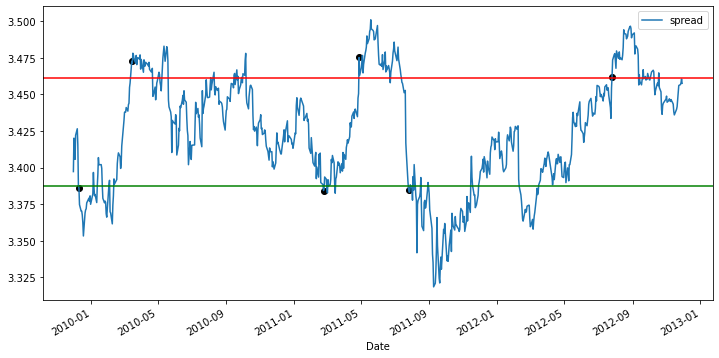

In [17]:
# Plotting the series, thresholds and trades
trades = spread_series[df["Date"].unique()]
plt.scatter(trades.index, trades.values, color = "k")
spread_series.plot(label = "spread")
plt.axhline(a_s, color='r')
plt.axhline(b_s, color='g')
plt.legend();

### Comparison between Two Rules

In [18]:
c_list = np.linspace(0, 0.03, 20)
return_list_new = []
return_list_con = []

for c in c_list:
    a_s_new, b_s_new, a_l_new, b_l_new = OUOTZ.get_threshold_by_new_optimal_rule(c = c)
    a_s_con, b_s_con, a_l_con, b_l_con = OUOTZ.get_threshold_by_conventional_optimal_rule(c = c)
    
    df_new = backtesting(data, spread_series, a_s_new, b_s_new, a_l_new, b_l_new, beta, c)
    df_con = backtesting(data, spread_series, a_s_con, b_s_con, a_l_con, b_l_con, beta, c)
    
    return_new = df_new["Net-Returns(%)"].sum() / 100
    return_con = df_con["Net-Returns(%)"].sum() / 100
    
    return_list_new.append(return_new)
    return_list_con.append(return_con)

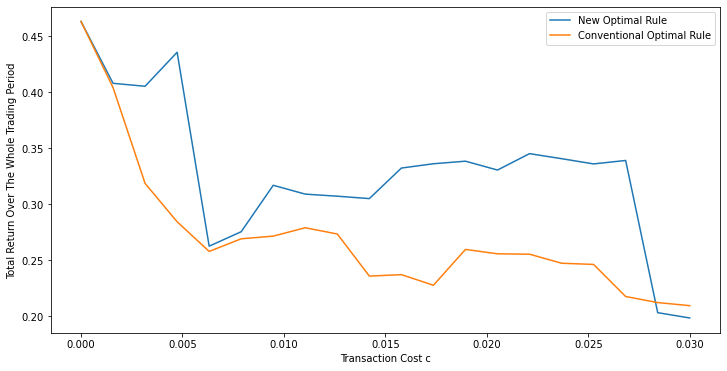

In [19]:
plt.plot(c_list, return_list_new, label = "New Optimal Rule")
plt.plot(c_list, return_list_con, label = "Conventional Optimal Rule")

plt.ylabel("Total Return Over The Whole Trading Period")
plt.xlabel("Transaction Cost c")
plt.legend()
plt.show()

## Conclusion

This notebook demonstrated an implementation of the methods for finding optimal trading thresholds under several assumptions and the goal to maximize the expected return per unit
time. The empirical results are similar to the results in the paper, confirming that the implementation seems to be correct.

Key takeaways from the notebook:
- Analytic way to calculate the expected trade length with a two-sided boundary for the series follows O-U process.
- A way to reduce optimal trading thresholds finding problem to a simple maximization problem.

## References

1. [Zeng, Z. and Lee, C.-G. Pairs trading:  optimal thresholds and profitability. Quantitative Finance, 14(11): 1881–1893.](https://www.tandfonline.com/doi/pdf/10.1080/14697688.2014.917806)